# Wavelet Transformation
https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.cwt.html

## Scipy

    Performs a continuous wavelet transform on data, using the wavelet function. 
    A CWT performs a convolution with data using the wavelet function, which is 
    characterized by a width parameter and length parameter

    Parameters:	
    data : (N,) ndarray
        data on which to perform the transform.

    wavelet : function
        Wavelet function, which should take 2 arguments. 
        " The first argument is the number of points that the returned vector" will have
        (len(wavelet(width,length)) == length). 
        " The second is a width parameter, defining the size of the wavelet" 
        (e.g. standard deviation of a gaussian). 
        See ricker, which satisfies these requirements.

    widths : (M,) sequence
        Widths to use for transform.

    Returns:	
    cwt: (M, N) ndarray
        Will have shape of (len(widths), len(data)).

In [1]:
#length = min(10 * width[ii], len(data))
#cwt[ii,:] = scipy.signal.convolve(data, wavelet(length, width[ii]), mode='same')

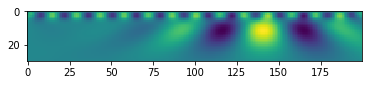

In [41]:
%matplotlib inline 
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr)

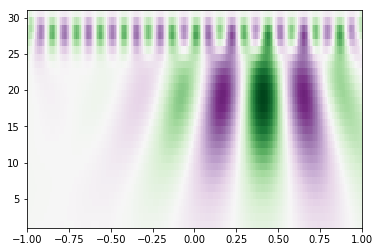

In [42]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

## pywt

    PyWavelets is free and Open Source wavelet transform software for the Python programming language. 
    It combines a simple high level interface with low level C and Cython performance.
    PyWavelets is very easy to use and get started with. Just install the package, 
    open the Python interactive shell and type:

pywt.dwt(data,  wavelet,  mode = 'symmetric',  axis=-1) <br>
Single level Discrete Wavelet Transform

In [10]:
import pywt
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x, 'db1')

In [11]:
cA

array([ 7.07106781,  1.41421356,  2.12132034,  7.07106781])

In [12]:
cD

array([-2.82842712,  0.        , -4.94974747, -1.41421356])

In [13]:
x2 = pywt.idwt(cA, cD, 'db2')
x2

array([-0.09807621,  1.6339746 ,  1.98205081,  2.70096189, -0.0669873 ,
        8.34807621])

In [14]:
import pywt
cA, cD = pywt.dwt([1, 2, 3, 4, 5, 6], 'db1')

In [15]:
cA

array([ 2.12132034,  4.94974747,  7.77817459])

In [16]:
cD

array([-0.70710678, -0.70710678, -0.70710678])

Multilevel 1D Discrete Wavelet Transform of data <br>
pywt.wavedec(data, wavelet, mode='symmetric', level=None, axis=-1)

In [17]:
from pywt import wavedec
coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=2)
cA2, cD2, cD1 = coeffs
cD1

array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])

In [18]:
cD2

array([-2., -2.])

In [19]:
cA2

array([  5.,  13.])

pywt.downcoef(part, data, wavelet, mode='symmetric', level=1)  <br>
Partial Discrete Wavelet Transform data decomposition.

In [20]:
import pywt
w = pywt.Wavelet('sym5')
pywt.dwt_max_level(data_len=1000, filter_len=w.dec_len)

6

In [21]:
pywt.dwt_max_level(1000, w)

6

### Sample 1

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
time, sst = pywt.data.nino()
dt = time[1]-time[0]

wavelet = 'cmor'
scales = np.arange(1,128)
[cfs,frequencies] = pywt.cwt(sst,scales,wavelet,dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]

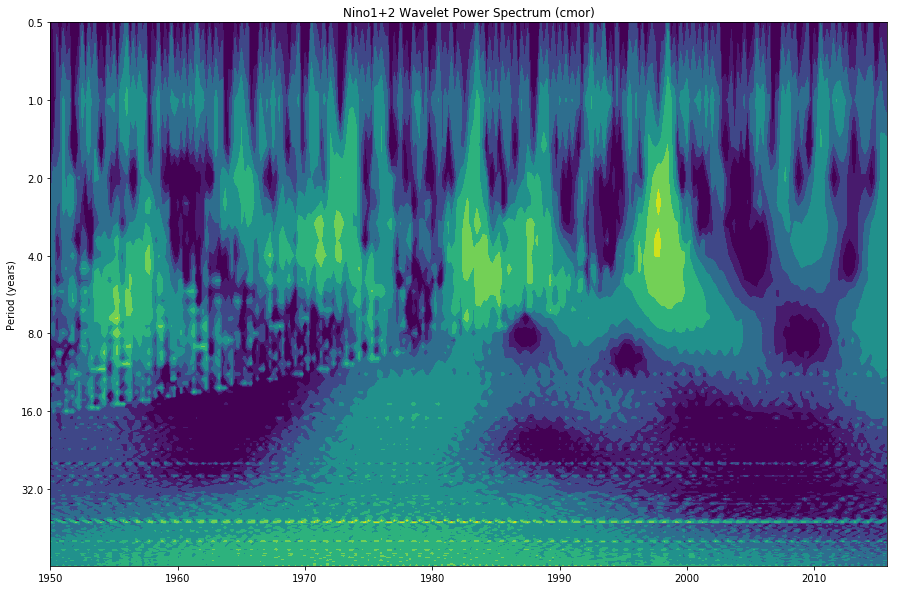

In [27]:
f, ax = plt.subplots(figsize=(15,10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

### Sample 2

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)
wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool
# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

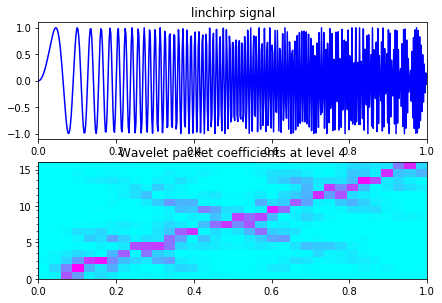

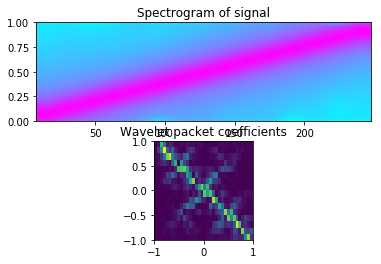

In [40]:
# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")

ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")
plt.show()

https://github.com/ernestyalumni/18-327-wavelets-filter-banks/blob/master/tools/Handout16_examples.py

In [ ]:
## This is my implementation of the Handout and Slide examples for the Lecture Notes of 
## using Python libraries numpy, scipy, sympy for Handout 16## 
## Copyleft 2015, Ernest Yeung <ernestyalumni@gmail.com>                 

#import sympy
#from sympy import fourier_transform, inverse_fourier_transform, sqrt, exp, I, pi
#from sympy.abc import t, f

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pywt
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [2]:
choice = 'bior2.2' # choice of wavelet
Wchoice = pywt.Wavelet(choice) #Wsym5 = pywt.Wavelet('sym5')
# EY : 20150708 note Why are 5/3 wavelets called bior2.2, in Matlab as well? 
# cf. http://www.mathworks.com/matlabcentral/newsreader/view_thread/307357

In [14]:
Wchoice

pywt._extensions._pywt.Wavelet(name='bior2.2', filter_bank=([0.0, -0.1767766952966369, 0.3535533905932738, 1.0606601717798212, 0.3535533905932738, -0.1767766952966369], [-0.0, 0.3535533905932738, -0.7071067811865476, 0.3535533905932738, -0.0, 0.0], [0.0, 0.3535533905932738, 0.7071067811865476, 0.3535533905932738, 0.0, 0.0], [0.0, 0.1767766952966369, 0.3535533905932738, -1.0606601717798212, 0.3535533905932738, 0.1767766952966369]))

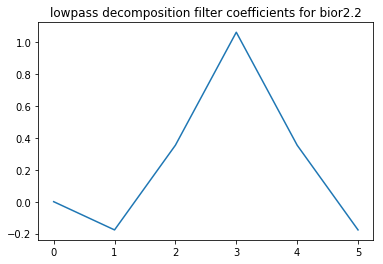

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Wchoice.filter_bank[0],)
plt.title("lowpass decomposition filter coefficients for "+choice)

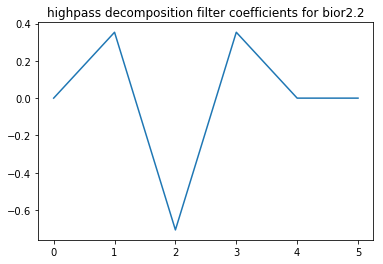

In [7]:
plt.plot(Wchoice.filter_bank[1])
plt.title("highpass decomposition filter coefficients for "+choice)

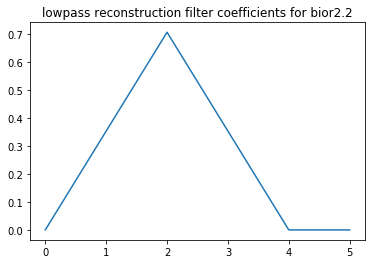

In [8]:
#plt.subplot(4,1,3)
plt.plot(Wchoice.filter_bank[2])
plt.title("lowpass reconstruction filter coefficients for "+choice)

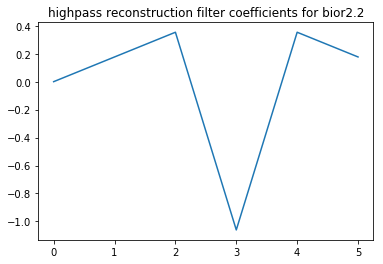

In [9]:
plt.plot(Wchoice.filter_bank[3])
plt.title("highpass reconstruction filter coefficients for "+choice)

In [4]:
print("The number of vanishing moments for the scaling function phi is ", Wchoice.vanishing_moments_phi)
print("The number of vanishing moments for the wavelet psi is ", Wchoice.vanishing_moments_psi)
assert Wchoice.biorthogonal # the wavelet to choose for this example should be biorthogonal
[phi_d, psi_d, phi_r, psi_r, x] = Wchoice.wavefun()

The number of vanishing moments for the scaling function phi is  2
The number of vanishing moments for the wavelet psi is  2


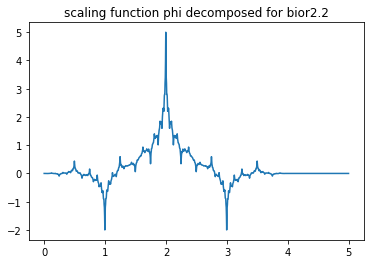

In [10]:
# "The default level of resolution for pywt, PyWavelets, is 8"
plt.plot(x,phi_d)
plt.title("scaling function phi decomposed for "+choice)

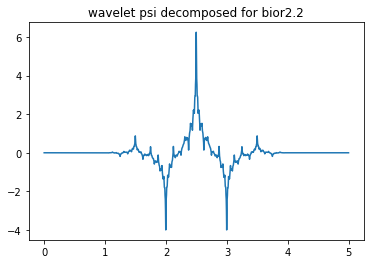

In [11]:
#plt.subplot(4,1,2)
plt.plot(x,psi_d)
plt.title("wavelet psi decomposed for "+choice)

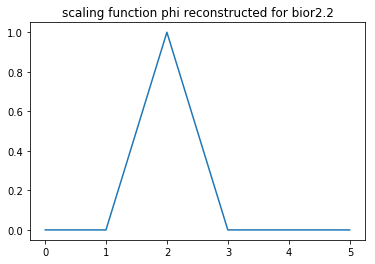

In [12]:
plt.plot(x,phi_r)
plt.title("scaling function phi reconstructed for "+choice)

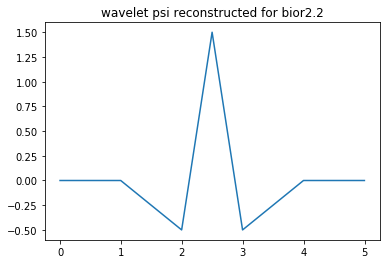

In [13]:
plt.plot(x,psi_r)
plt.title("wavelet psi reconstructed for "+choice)